## Charge libraries

In [2]:
library(tidyverse)
library(magrittr)
library(ggpubr)
library(vegan)
library(patchwork)
source("../scripts/helper_functions.R")

## Load meteor and sylph data

In [3]:
meteor <- read_csv("../data/meteor.csv", show_col_types = FALSE) # meteor data
sylph <- read_csv("../data/sylph.csv", show_col_types = FALSE) # sylph data
sylph %<>% filter(stringr::str_count(clade_name, "\\|") == 6) # same detection in taxonomy for sylph and meteor (strain level)

In [4]:
prune(meteor, pattern = "1_6", sd_threshold = 0.1) %>%
               {
                 X <- (t(. > 0)) * 1 
                 groups <- ifelse(grepl("ASAL", rownames(X)), "ASAL", "miG")
                 run_pcoa_analysis("jaccard", X, groups)
               } -> meteor_r
prune(sylph, pattern = "1_6", sd_threshold = 1) %>%
               {
                 X <- (t(. > 0)) * 1  
                 groups <- ifelse(grepl("ASAL", rownames(X)), "ASAL", "miG")
                 run_pcoa_analysis("jaccard", X, groups)
               } -> sylph_r

Warning message:
“The `x` argument of `as_tibble.matrix()` must have unique column names if `.name_repair` is omitted as of tibble 2.0.0.
ℹ Using compatibility `.name_repair`.”


In [5]:
prune(meteor, pattern = "^ASAL[0-9]+$|^G[0-9]+$", sd_threshold = 0.1) %>%
               {
                 X <- (t(. > 0)) * 1   
                 groups <- ifelse(grepl("ASAL", rownames(X)), "ASAL", "miG")
                 run_pcoa_analysis("jaccard", X, groups)
               } -> meteor_
prune(sylph, pattern = "^ASAL[0-9]+$|^G[0-9]+$", sd_threshold = 1) %>%
               {
                 X <- (t(. > 0)) * 1    
                 groups <- ifelse(grepl("ASAL", rownames(X)), "ASAL", "miG")
                 run_pcoa_analysis("jaccard", X, groups)
               } -> sylph_
  

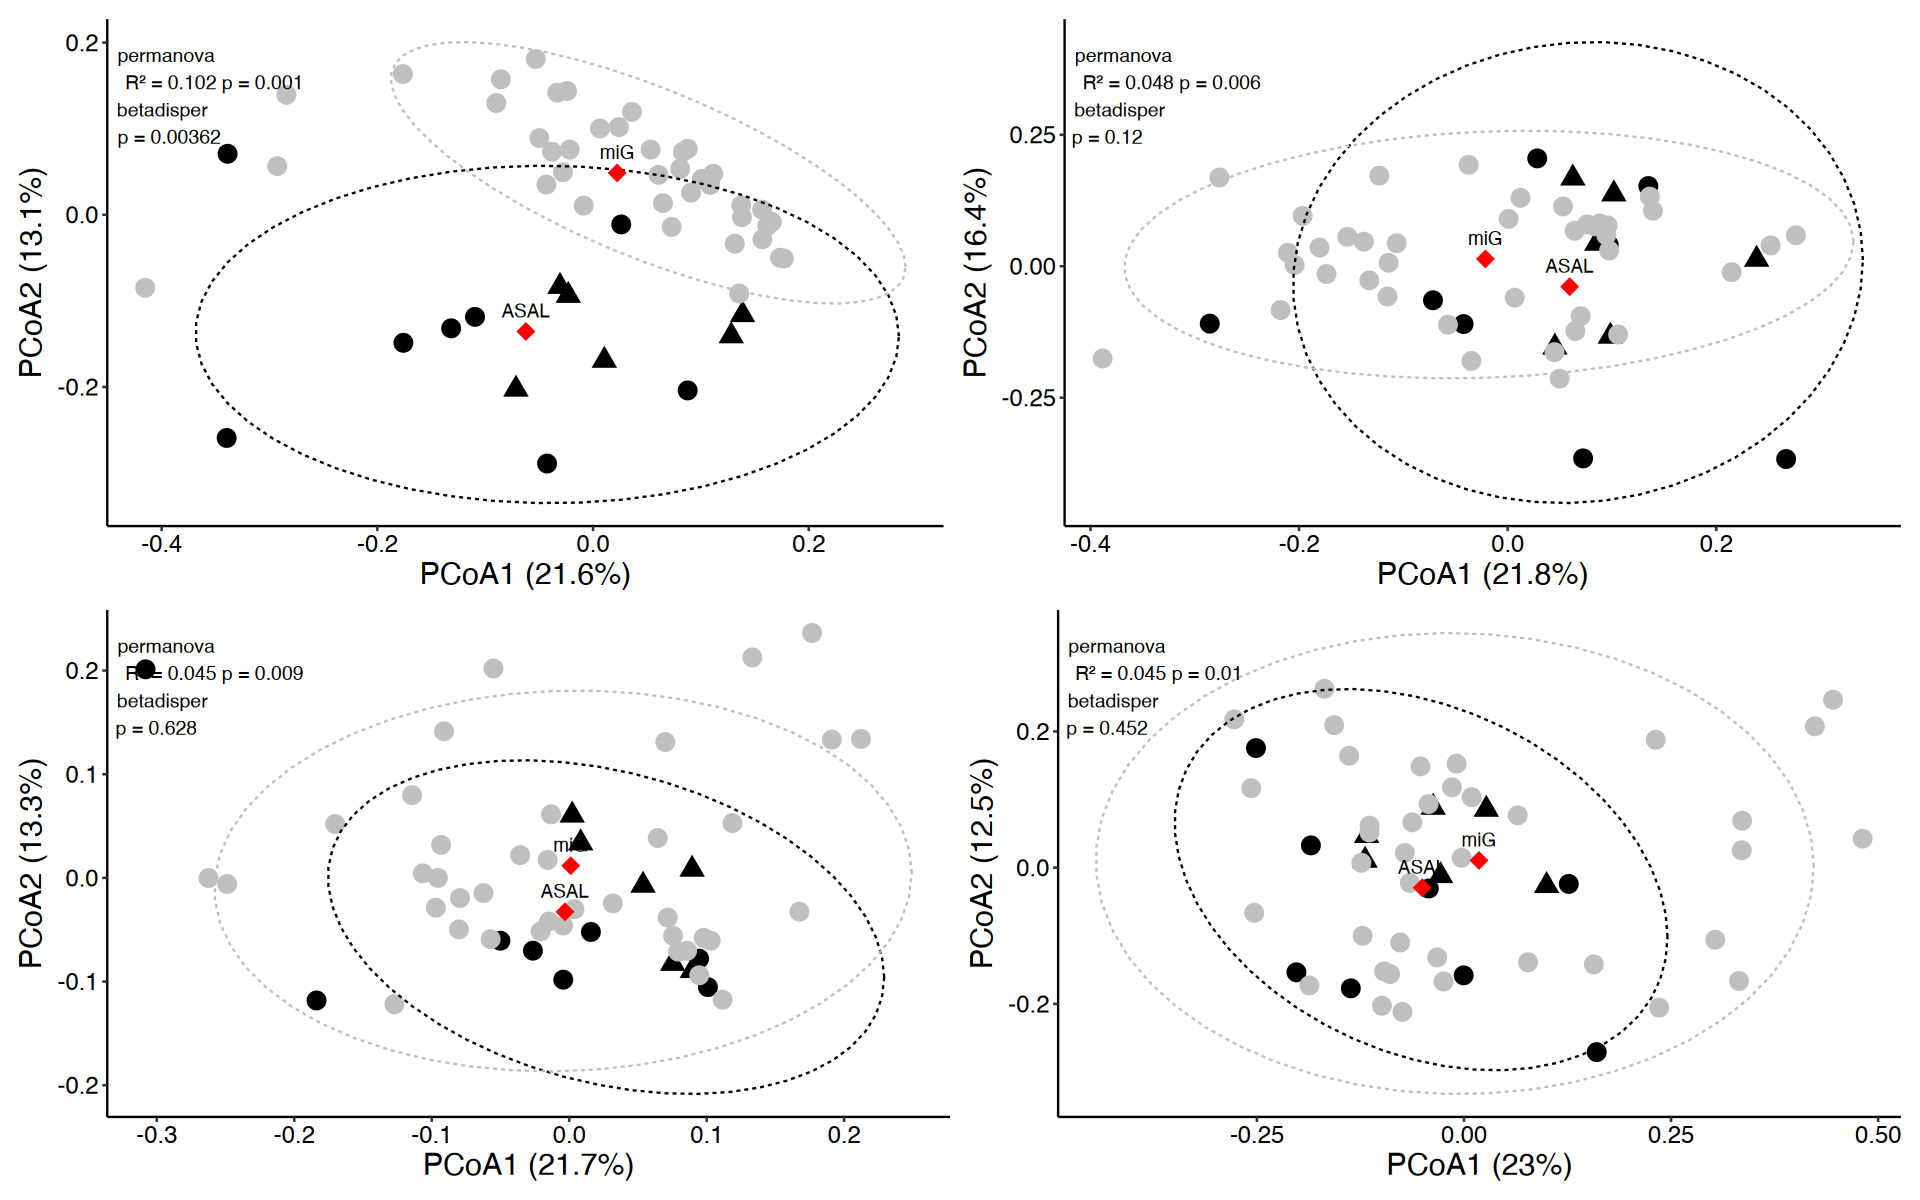

In [6]:
options(repr.plot.width=16, repr.plot.height=10)
(meteor_$plot + sylph_$plot) / (meteor_r$plot + sylph_r$plot)